# DataIO Examples

For these examples we will use 2 hrs of simulated Crab data with the Compton sphere mass model. This is an idealized mass model with a full-sky instantanious field of view, used only for development. The file can be downloaded using the cosipy utility function below. 

wasabi path: ComptonSphere/mini-DC2/GalacticScan.inc1.id1.crab2hr.extracted.tra.gz <br />
File size: 322 MB

In [ ]:
from cosipy.util import fetch_wasabi_file
fetch_wasabi_file('ComptonSphere/mini-DC2/GalacticScan.inc1.id1.crab2hr.extracted.tra.gz')

## Data formats overview

The COSI high-level analysis data is composed of a stream of time-tagged events. Each event has an associated timestamp ($t$), measured energy ($E_m$), and the three parameters of the Compton Data Space (CDS): scattering polar angle ($\phi$), and the longitude and latitude angles defining the direction of the first scattered gamma ray ($\psi$ and $\chi$). See these references for an explanation of the CDS: [1](https://github.com/cositools/cosi-data-challenge-2/tree/main/cosipy-intro#the-compton-data-space),[2](https://arxiv.org/abs/2308.11436), [3](https://arxiv.org/abs/2102.13158).

There are three formats that contain time-tagged events:
* tra files. These have the extension ".tra". They are text files generated by MEGAlib that contain track information. You can read about the format in MEGALib's [Mimrec documentation](https://github.com/zoglauer/megalib/blob/main/doc/Mimrec.pdf). Most users won't need to use these files.
* FITS files. These have the extension ".fits". They are essentially tra files that have been converted into the [FITS](https://fits.gsfc.nasa.gov/) format. This is the typical starting point for a cosipy analysis.
* Unbinned HDF5 files. These have the extension ".h5" or ".hdf5". This is another option for converting the tra files into a binary format, in this case ([HDF5](https://www.hdfgroup.org/solutions/hdf5/)). Some examples use an HDF5 format instead of FITS, since it can be more computationally efficient.

Currently, all the analyses in cosipy use binned data. These are also HDF5 binary files and have the extension ".h5" or ".hdf5". They contain a 4-dimensional sparse histogram corresponding to the variables $t$, $E_m$, $\phi$ and $\psi\phi$. The binned direction of the scattered gamma ray ($\phi$ and $\psi\phi$) is encoded as a pixel in a [HEALpix](https://healpix.sourceforge.io/) map.

<div class="alert alert-block alert-info">
<b>Note:</b> The data formats are likely to change and consolidate in future versions. In addition, we are contemplating adding more information to each event that cannot be captured by the Compton Data Space --e.g. the scattering angle and direction of the second interaction, for those events with more than 2 hits.
</div>

## Example 1: Standard binned analysis

Import the BinnedData class from cosipy:

In [1]:
from cosipy import BinnedData
%matplotlib inline 

10:44:43 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=693506;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=503482;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=113949;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=603534;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

10:44:45 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=436481;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=892811;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=378295;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=468787;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=847982;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=933240;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=266236;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=82342;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=532777;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=637640;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of F to 1e-99 because there was a postive transform   ]8;id=105550;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=364215;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=259140;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=552462;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

10:44:45 INFO      Starting 3ML!                                                                     ]8;id=603244;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=905296;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=689267;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=873945;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=480669;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=815;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=282557;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=230210;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   no display variable set. using backend for graphics without display (agg)         ]8;id=269009;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=577205;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/__init__.py#46\46]8;;\

/zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: dev is an invalid version and will not be supported in a future release
  warnings.warn(


10:44:50 WARNING   ROOT minimizer not available                                                ]8;id=966875;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=265165;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=72521;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=605572;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

10:44:52 WARNING   PyGMO is not available                                                      ]8;id=145891;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=446981;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

10:44:53 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=19565;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=389702;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

10:44:54 WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=918898;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=693090;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=263202;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=975208;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

10:44:56 WARNING   No fermitools installed                                              ]8;id=421856;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=511842;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

10:44:56 WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=189740;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=150136;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=297232;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=411648;file:///zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

### Get the unbinned COSI dataset
    
Define an instance of the BinnedData object. Input parameters are passed from inputs.yaml. <br/>
Note: We are still working on refining the handling of input/output parameters. This will be updated in future releases of cosipy.  

In [3]:
analysis = BinnedData("inputs.yaml")

A typical DataIO configuration yaml files looks like this:

```yaml
data_file: "/path/to/crab/tra/file" # Full path to unbinned tra data file. Only needed when converting a tra file to fits or HDF5.
ori_file: "/path/to/ori/file" # Full path to spacecraft orientation file. See next tutorial. Only needed when converting a tra file to fits or HDF5.
unbinned_output: 'hdf5' # Format of converted unbinned file 'fits' or 'hdf5'. Only needed when converting a tra file to fits or HDF5.
time_bins: 60 # time bin size in seconds. Takes int, float, or list of bin edges.
energy_bins: [100.,  200.,  500., 1000., 2000., 5000.] # Energy  bin edges [keV]. Needs to match response binning.
phi_pix_size: 6 # binning of Compton scattering angle [deg]. 
nside: 8 # HEALPix binning of psi chi local. Needs to match response binning.
scheme: 'ring' # HEALPix binning scheme of psi chi
tmin: 1835478000.0 # Min time cut in GPS seconds.
tmax: 1835485200.0 # Max time cut in GPS seconds.
```

The starting point for the high-level data analysis is the so-called Level 1c data, which is a photon list consisting of Compton event parameters, e.g. energies of the scattered gamma ray and recoil electron, interaction positions within the detector, and time-tags. The photon list comes from the event identification and reconstruction, and it is stored in a tra file. From this information we can determine the total measured energy of the incidenct photon, the Compton scattering angle, the scattering direction, the distance between interactions, and the pointing of the instrument when the photon was detected, which is the main information needed for the high-level analysis. As a very first step, we read the data from the tra file and construct the COSI dataset. The data format for this is a dictionary containing the relevant information for all photons (i.e. an unbinned photon list). The dictionary can be stored as either a fits file or an hdf5 file.

**Note:** Most users will not need to worry about this step, as the COSI data will already be provided in fits file format. However, this function can also be used for converting simulated data from MEGAlib to the proper cosipy format.

In [4]:
analysis.read_tra(output_name="unbinned_data")

Preparing to read file...
Reading file...


100%|██████████| 53383576/53383576.0 [03:35<00:00, 247474.98it/s]


Making COSI data set...
total events to procecss: 3324977
Initializing arrays...
Making dictionary...
Saving file...
total processing time [s]: 720.1664335727692


### Bin the data
The data is binned with four axes: time, measured energy, compton scattering angle (Phi), and scattering direction (PsiChi). The binning should match that of the response used for the analysis. Here we will bin the data in Galactic coordinates, which is the default. The data can also be binned in local coordinates by specifying the keyword psichi_binning="local".  

In [5]:
analysis.get_binned_data()

binning data...
Time unit: s
Em unit: keV
Phi unit: deg
PsiChi unit: None


### Let's take a look at the raw spectrum and lightcurve:

getting raw spectrum...


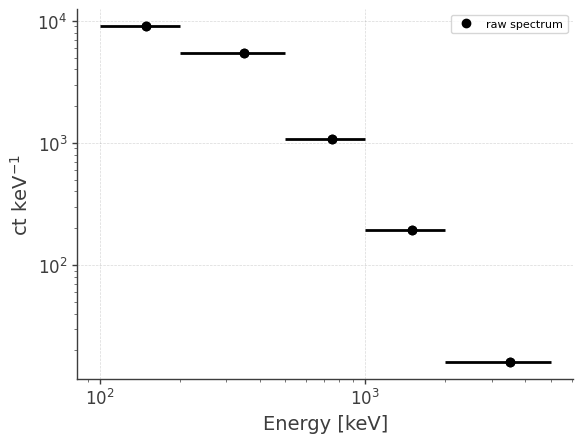

In [6]:
analysis.get_raw_spectrum()

getting raw lightcurve...


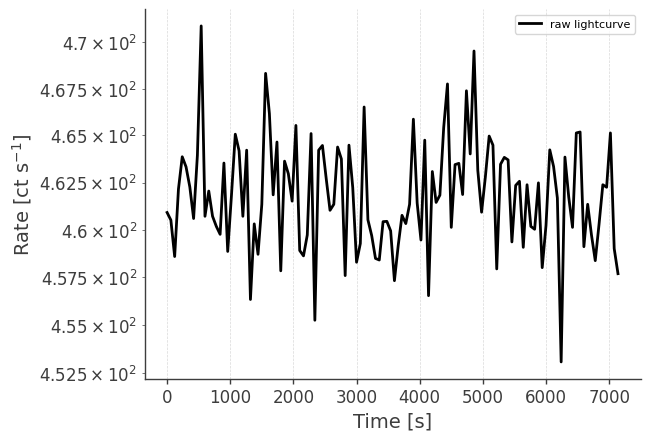

In [7]:
# LC in plot below is normalized to initial time. 
analysis.get_raw_lightcurve()

## Example 2: Some available options for the standard binned anlaysis
In the previous step we saved the unbinned data to an hdf5 file with the read_tra method. Here we will load the unbinnned data from file instead of running read_tra again. We will also save the binned data to file, and make binning plots.

binning data...
Time unit: s
Em unit: keV
Phi unit: deg
PsiChi unit: None


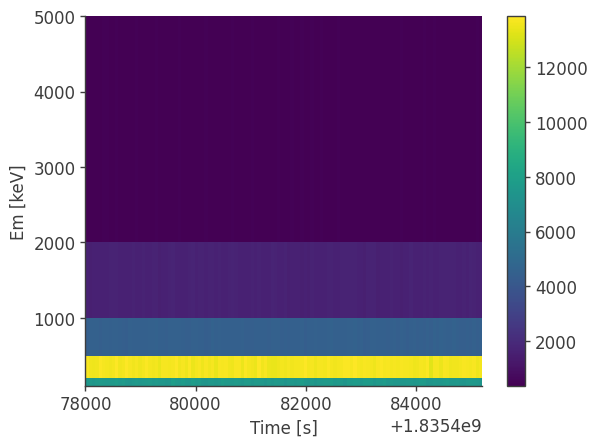

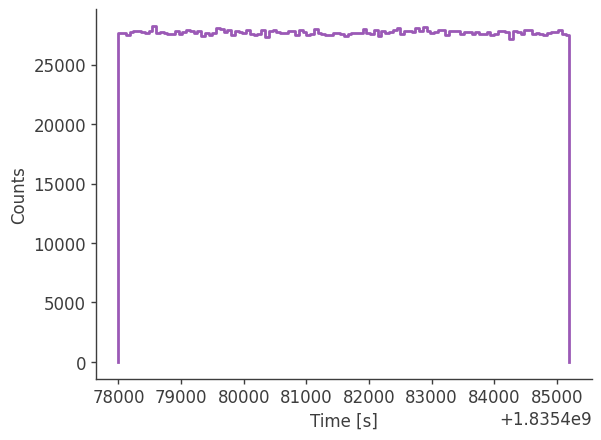

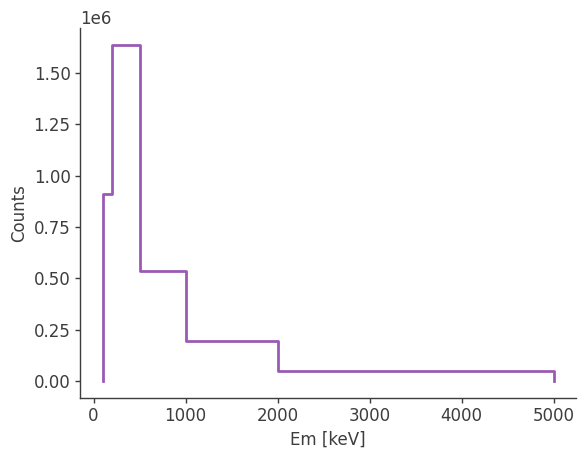

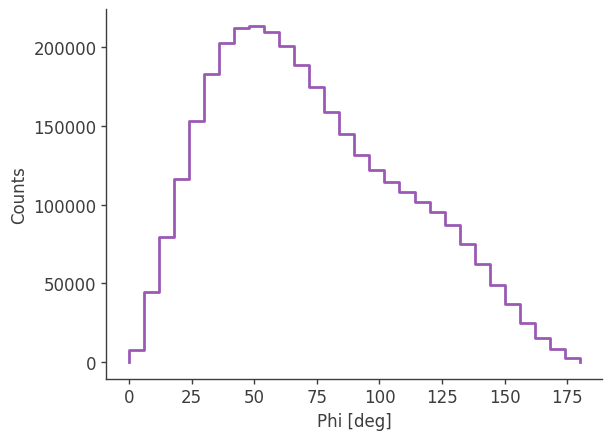

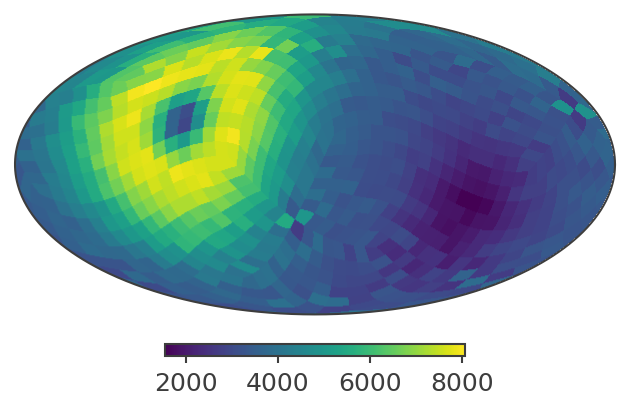

plotting psichi in Galactic coordinates...


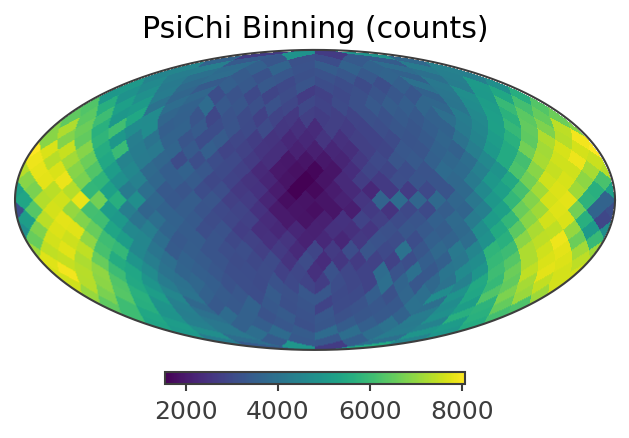

In [8]:
analysis = BinnedData("inputs.yaml")
analysis.get_binned_data(unbinned_data="unbinned_data.hdf5", output_name="binned_data", make_binning_plots=True)

The two healpix maps above show the projection onto the PsiChi dimension, where the upper map is in the local coordinate system, and the lower map is in the Galactic coordinate system. 

In the last step we saved the binned data to an hdf5 file. We can load this directly to access the binned data histogram object. 

In [9]:
analysis = BinnedData("inputs.yaml")
analysis.load_binned_data_from_hdf5("binned_data.hdf5")

# For example, we can project onto the time axis:
analysis.binned_data.axes["Time"].centers

<Quantity [1.83547803e+09, 1.83547809e+09, 1.83547815e+09, 1.83547821e+09,
           1.83547827e+09, 1.83547833e+09, 1.83547839e+09, 1.83547845e+09,
           1.83547851e+09, 1.83547857e+09, 1.83547863e+09, 1.83547869e+09,
           1.83547875e+09, 1.83547881e+09, 1.83547887e+09, 1.83547893e+09,
           1.83547899e+09, 1.83547905e+09, 1.83547911e+09, 1.83547917e+09,
           1.83547923e+09, 1.83547929e+09, 1.83547935e+09, 1.83547941e+09,
           1.83547947e+09, 1.83547953e+09, 1.83547959e+09, 1.83547965e+09,
           1.83547971e+09, 1.83547977e+09, 1.83547983e+09, 1.83547989e+09,
           1.83547995e+09, 1.83548001e+09, 1.83548007e+09, 1.83548013e+09,
           1.83548019e+09, 1.83548025e+09, 1.83548031e+09, 1.83548037e+09,
           1.83548043e+09, 1.83548049e+09, 1.83548055e+09, 1.83548061e+09,
           1.83548067e+09, 1.83548073e+09, 1.83548079e+09, 1.83548085e+09,
           1.83548091e+09, 1.83548097e+09, 1.83548103e+09, 1.83548109e+09,
           1.83548115e+09

Next we will load the binnned data from file to make the raw spectrum and lightcurve. We will also save the outputs, which are written to both a pdf and dat file.  

getting raw spectrum...
Time unit: s
Em unit: keV
Phi unit: deg
PsiChi unit: None


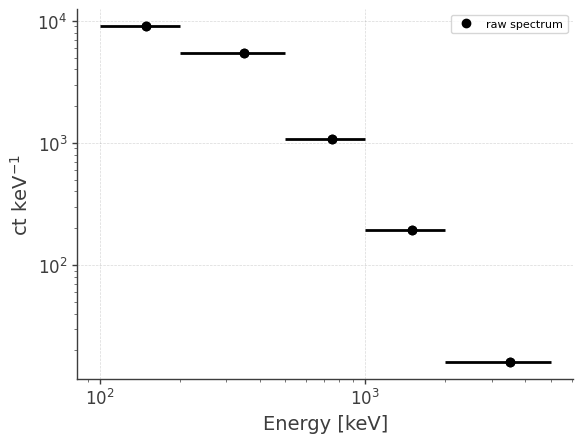

getting raw lightcurve...
Time unit: s
Em unit: keV
Phi unit: deg
PsiChi unit: None


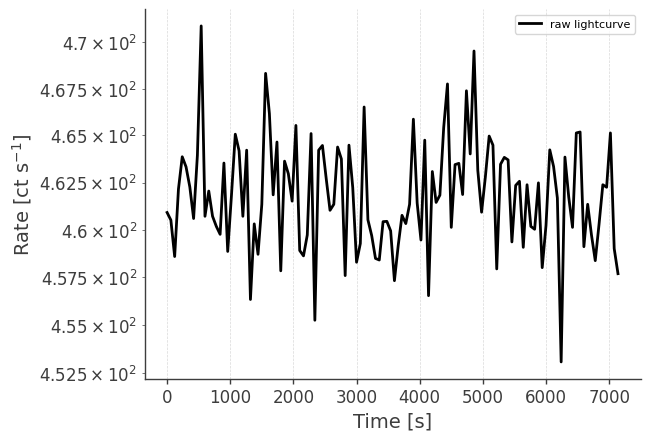

In [10]:
analysis.get_raw_spectrum(binned_data="binned_data.hdf5", output_name="crab_spec")
analysis.get_raw_lightcurve(binned_data="binned_data.hdf5", output_name="crab_lc")

## Example 3: Combining multiple data files

### Combining unbinned data
One way to combine data files is to first combine the unbinned data, and then bin the combined data. As a proof of concept, we'll combine the crab dataset 3 times, and as a sanity check we can then compare to 3x the actual data. 

In [11]:
analysis = BinnedData("inputs.yaml")
analysis.combine_unbinned_data(["unbinned_data.hdf5","unbinned_data.hdf5","unbinned_data.hdf5"], output_name="combined_unbinned_data")


adding unbinned_data.hdf5...


adding unbinned_data.hdf5...


adding unbinned_data.hdf5...



Bin the combined data file:

In [12]:
analysis.get_binned_data(unbinned_data="combined_unbinned_data.hdf5", output_name="combined_binned_data")

binning data...
Time unit: s
Em unit: keV
Phi unit: deg
PsiChi unit: None


Get raw spectrum and light curve:

getting raw spectrum...
Time unit: s
Em unit: keV
Phi unit: deg
PsiChi unit: None


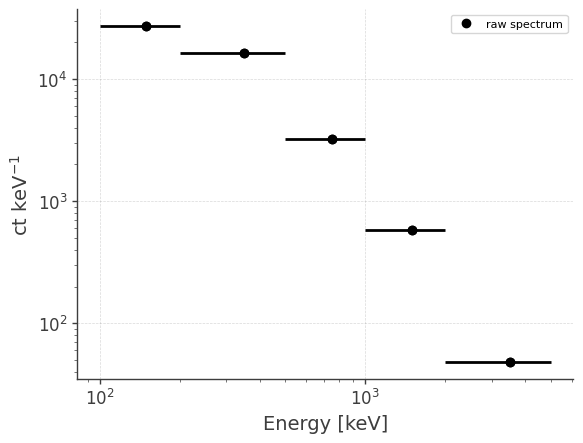

getting raw lightcurve...
Time unit: s
Em unit: keV
Phi unit: deg
PsiChi unit: None


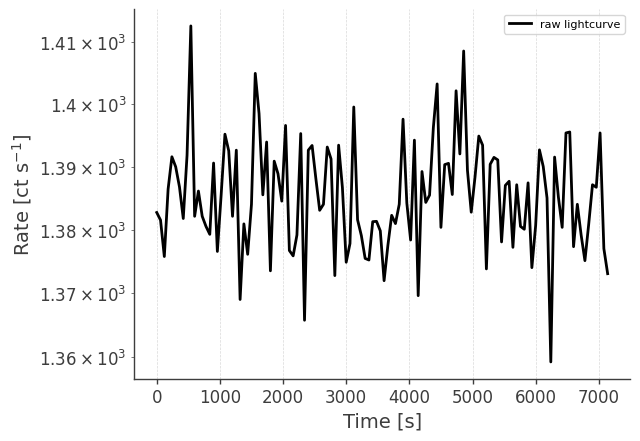

In [13]:
analysis.get_raw_spectrum(binned_data="combined_binned_data.hdf5", output_name="crab_spec_3x")
analysis.get_raw_lightcurve(binned_data="combined_binned_data.hdf5", output_name="crab_lc_3x")

Compare the combined data set to 3x the actual data. This step requires output files from earlier. 

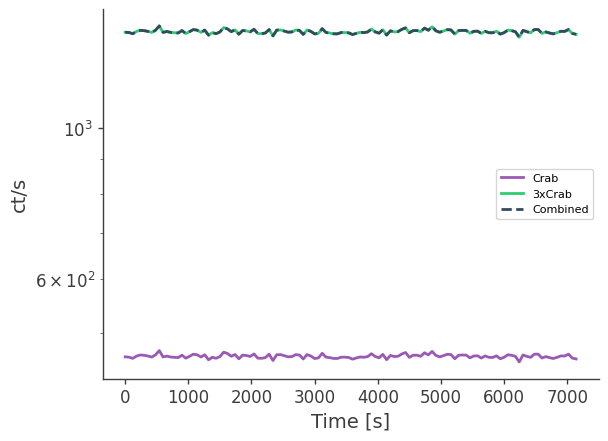

In [14]:
# LCs: 
# The plot below is normalized to the initial time.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# LCs:
df = pd.read_csv("crab_lc.dat", delim_whitespace=True)
plt.semilogy(df["Time[UTC]"] - df["Time[UTC]"][0], df["Rate[ct/s]"],label="Crab")
plt.semilogy(df["Time[UTC]"] - df["Time[UTC]"][0], 3*df["Rate[ct/s]"],label="3xCrab")

df = pd.read_csv("crab_lc_3x.dat", delim_whitespace=True)
plt.semilogy(df["Time[UTC]"] - df["Time[UTC]"][0], df["Rate[ct/s]"],ls="--",label="Combined")

plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("ct/s")
plt.savefig("combined_lc_comparison.pdf")
plt.show()

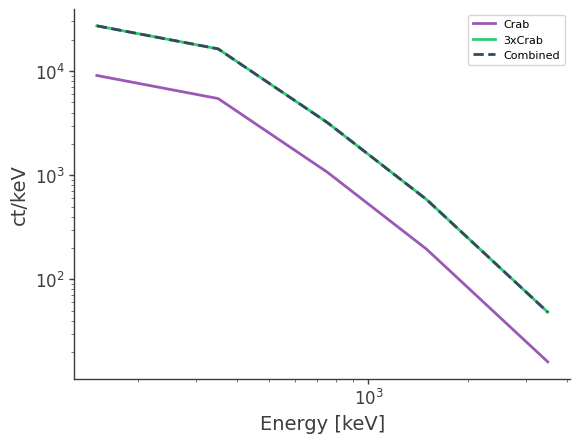

In [15]:
# Spectrum
df = pd.read_csv("crab_spec.dat", delim_whitespace=True)
plt.loglog(df["Energy[keV]"],df["Rate[ct/keV]"],label="Crab")
plt.loglog(df["Energy[keV]"],3*df["Rate[ct/keV]"],label="3xCrab")

df = pd.read_csv("crab_spec_3x.dat", delim_whitespace=True)
plt.loglog(df["Energy[keV]"],df["Rate[ct/keV]"],ls="--",label="Combined")

plt.legend()
plt.xlabel("Energy [keV]")
plt.ylabel("ct/keV")
plt.savefig("combined_spectrum_comparison.pdf")
plt.show()            

### Combining binned data

An alternative way to combine the data is to sum the binned histograms. This requires that the histograms being combined have the same exact binning.

In [18]:
analysis = BinnedData("inputs.yaml")
analysis.get_binned_data(unbinned_data="unbinned_data.hdf5", output_name="binned_data")
combined_hist = analysis.binned_data + analysis.binned_data + analysis.binned_data

print()
print("The total number of photons has increased by a factor of 3, as expected:")
print("single histogram: " + str(np.sum(analysis.binned_data.contents.todense())))
print("combined histogram: " + str(np.sum(combined_hist.contents.todense())))

binning data...
Time unit: s
Em unit: keV
Phi unit: deg
PsiChi unit: None

The total number of photons has increased by a factor of 3, as expected:
single histogram: 3324977.0
combined histogram: 9974931.0


## Example 4: Making data selections
### Make time cut
Only time cuts are available for now. The parameters tmin and tmax are passed from the yaml file. In this example we will select the first half of the dataset. 

In [19]:
analysis = BinnedData("inputs_half_time.yaml")
analysis.select_data_time(unbinned_data="combined_unbinned_data.hdf5", output_name="selected_unbinned_data")

Making data selections...
Saving file...


### Bin the selected data 

In [20]:
analysis.get_binned_data(unbinned_data="selected_unbinned_data.hdf5", output_name="selected_combined_binned_data")

binning data...
Time unit: s
Em unit: keV
Phi unit: deg
PsiChi unit: None


Get raw spectrum and lightcurve:

getting raw spectrum...
Time unit: s
Em unit: keV
Phi unit: deg
PsiChi unit: None


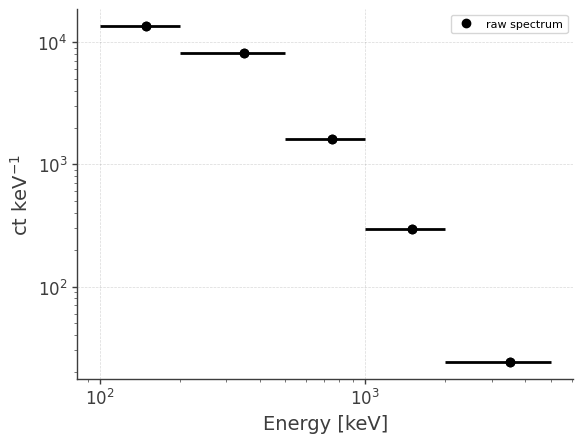

getting raw lightcurve...
Time unit: s
Em unit: keV
Phi unit: deg
PsiChi unit: None


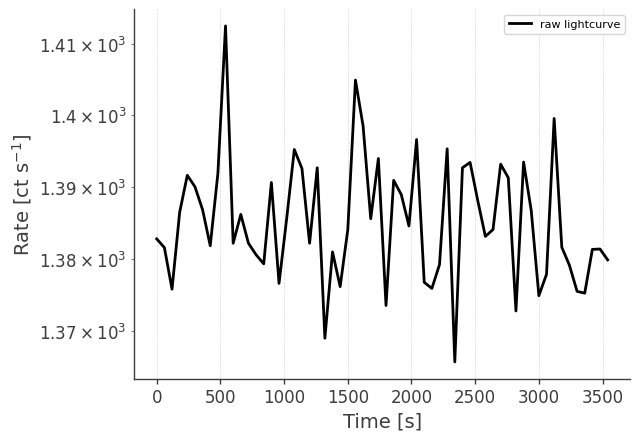

In [21]:
analysis.get_raw_spectrum(binned_data="selected_combined_binned_data.hdf5", output_name="selected_crab_spec_3x")
analysis.get_raw_lightcurve(binned_data="selected_combined_binned_data.hdf5", output_name="selected_crab_lc_3x")

### Compare to the full data set

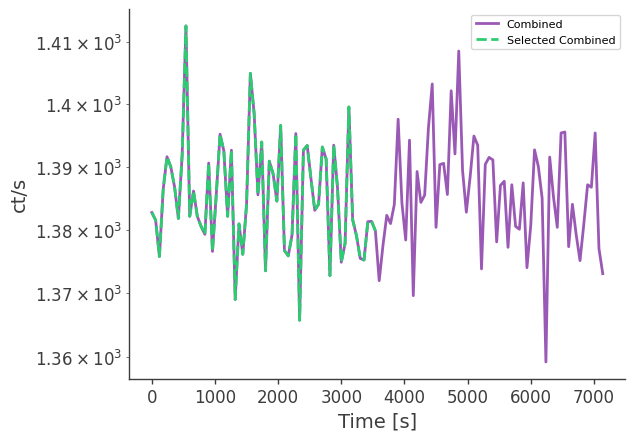

In [22]:
# LCs: 
# The plots below are normalized to the initial time.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("crab_lc_3x.dat", delim_whitespace=True)
plt.semilogy(df["Time[UTC]"] - df["Time[UTC]"][0], df["Rate[ct/s]"],ls="-",label="Combined")

df = pd.read_csv("selected_crab_lc_3x.dat", delim_whitespace=True)
plt.semilogy(df["Time[UTC]"] - df["Time[UTC]"][0], df["Rate[ct/s]"],ls="--",label="Selected Combined")

plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("ct/s")
plt.savefig("combined_lc_comparison.pdf")
plt.show()

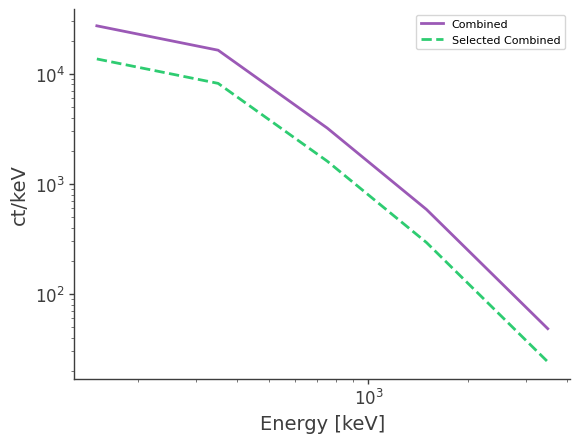

In [23]:
# Spectrum
df = pd.read_csv("crab_spec_3x.dat", delim_whitespace=True)
plt.loglog(df["Energy[keV]"],df["Rate[ct/keV]"],ls="-",label="Combined")

df = pd.read_csv("selected_crab_spec_3x.dat", delim_whitespace=True)
plt.loglog(df["Energy[keV]"],df["Rate[ct/keV]"],ls="--",label="Selected Combined")

plt.legend()
plt.xlabel("Energy [keV]")
plt.ylabel("ct/keV")
plt.savefig("combined_spectrum_comparison.pdf")
plt.show()   

## Example 5: Dealing with memory issues

Combining and binning data can be memory intensive. It's therefore recommended to use a work station with plenty of RAM if possible. If you're running into memory limitatons, a workaround is to use chunks. 

We can read the unbinned data in chuncks by specifying event_min and event_max:

In [24]:
analysis = BinnedData("inputs.yaml")
analysis.read_tra(event_min=0, event_max=1000)
print("Number of photons in COSI dataset: " + str(analysis.cosi_dataset["TimeTags"].size))

Preparing to read file...
Reading file...


  0%|          | 16106/53383576.0 [00:00<04:04, 218242.46it/s]

Stopping here: only reading a subset of events
Making COSI data set...
total events to procecss: 999
Initializing arrays...


Making dictionary...
total processing time [s]: 10.723071336746216
Number of photons in COSI dataset: 999


The same thing can be done for binning the data in chuncks by specifying the event_range keyword:

binning data...
Time unit: s
Em unit: keV
Phi unit: deg
PsiChi unit: None


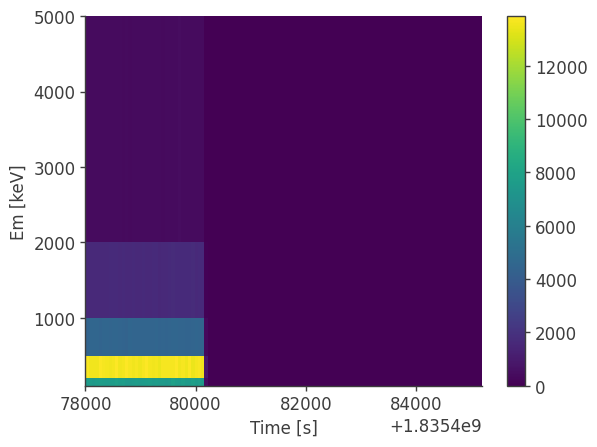

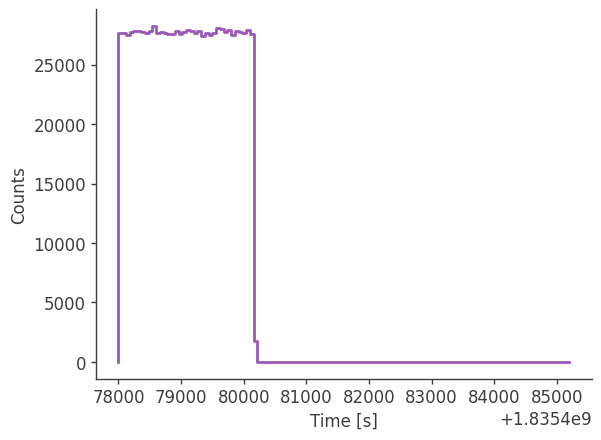

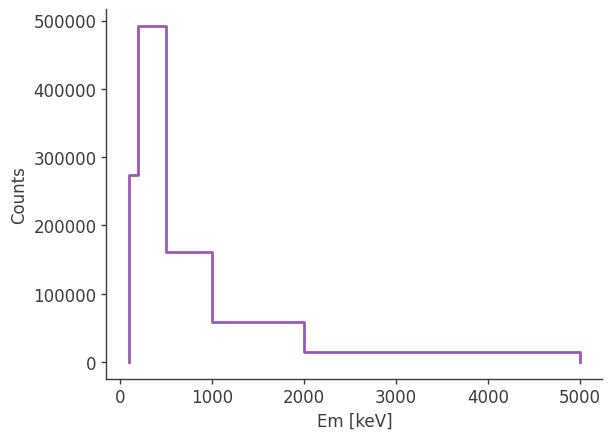

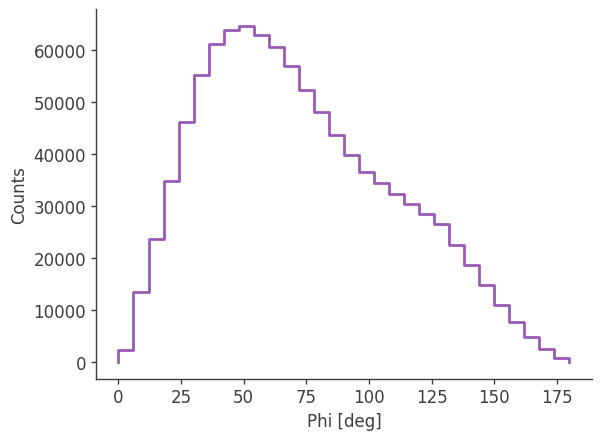

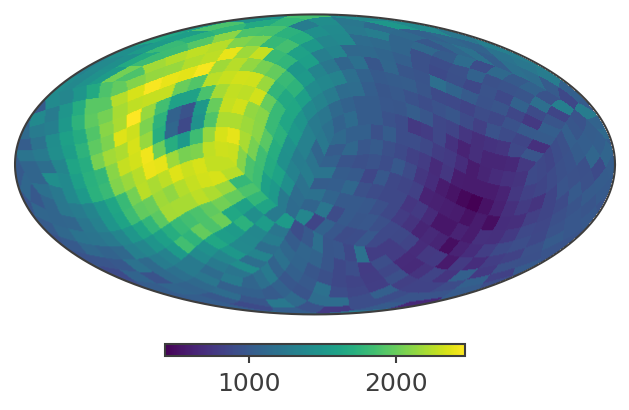

plotting psichi in Galactic coordinates...


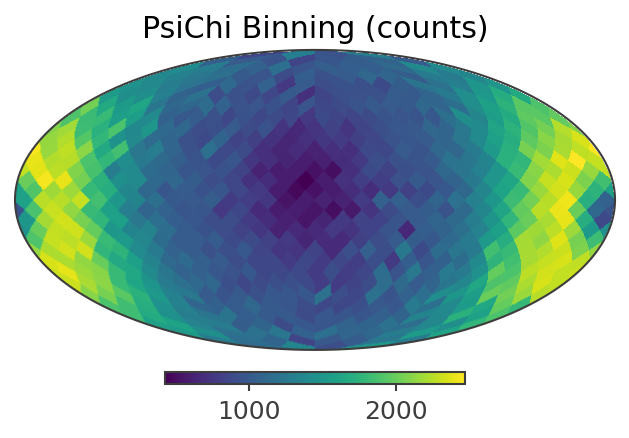

In [4]:
analysis = BinnedData("inputs.yaml")
analysis.get_binned_data(unbinned_data="unbinned_data.hdf5",event_range=[0,1e6],make_binning_plots=True)